PROBLEEM in sample validation

In [1]:
import mlmarker
from mlmarker.model import MLMarker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
#import everything for umap and pc
import umap
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('npop5_DIANN_report.tsv', sep='\t')
df.head()

,File.Name,Run,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,PG.MaxLFQ,Genes.Quantity,...,Channel.4,Channel.8,Channel.decoy,Precursor.Mz,Fragment.Info,Lib.Index,IM,iIM,Predicted.IM,Predicted.iIM
0,D:\SK\testes_npop6_plt2\gSK_testicles2Plt1_B-E...,gSK_testicles2Plt1_B-E17_1_6369,P36578,P36578,RL4_HUMAN,RPL4,722.571655,638.663879,548.888672,722.571655,...,1763.308716,251.899902,1574.354736,618.87561,b4^1/425.2507019;b3^1/354.213562;b5^1/496.2878...,8,0.943750,0.923295,0.952136,0.916066
1,D:\SK\testes_npop6_plt2\gSK_testicles2Plt1_B-E...,gSK_testicles2Plt1_B-E19_1_6371,P36578,P36578,RL4_HUMAN,RPL4,513.015564,443.084412,343.693756,513.015564,...,0.000000,0.000000,0.000000,618.87561,b4^1/425.2507019;b3^1/354.213562;b5^1/496.2878...,8,0.946250,0.923295,0.952574,0.917346
2,D:\SK\testes_npop6_plt2\gSK_testicles2Plt1_B-E...,gSK_testicles2Plt1_B-E24_1_6376,P36578,P36578,RL4_HUMAN,RPL4,340.007202,298.541382,397.104156,340.007202,...,47.546337,103.197624,0.000000,618.87561,b4^1/425.2507019;b3^1/354.213562;b5^1/496.2878...,8,0.966250,0.923295,0.951016,0.938218
3,D:\SK\testes_npop6_plt2\gSK_testicles2Plt1_B-F...,gSK_testicles2Plt1_B-F8_1_6452,P36578,P36578,RL4_HUMAN,RPL4,855.027344,759.164368,621.318420,855.027344,...,2050.362549,356.366730,0.000000,618.87561,b4^1/425.2507019;b3^1/354.213562;b5^1/496.2878...,8,0.928750,0.923295,0.941285,0.913176
4,D:\SK\testes_npop6_plt2\gSK_testicles2Plt1_B-F...,gSK_testicles2Plt1_B-F17_1_6382,P36578,P36578,RL4_HUMAN,RPL4,1112.027222,935.634827,1387.512451,1112.027222,...,729.923706,0.000000,244.161850,618.87561,b4^1/425.2507019;b3^1/354.213562;b5^1/496.2878...,8,0.947386,0.923295,0.954498,0.917046


In [3]:
df2 = df.pivot_table(columns='Run', index='Protein.Ids', values='PG.Quantity')
df2.head()

Run,gSK_testicles2Plt1_B-E17_1_6369,gSK_testicles2Plt1_B-E18_1_6370,gSK_testicles2Plt1_B-E19_1_6371,gSK_testicles2Plt1_B-E21_1_6373,gSK_testicles2Plt1_B-E22_1_6374,gSK_testicles2Plt1_B-E23_1_6375,gSK_testicles2Plt1_B-E24_1_6376,gSK_testicles2Plt1_B-F17_1_6382,gSK_testicles2Plt1_B-F18_1_6383,gSK_testicles2Plt1_B-F19_1_6384,...,gSK_testicles2Plt2_B-K9_1_6765,gSK_testicles2Plt2_B-L1_1_6782,gSK_testicles2Plt2_B-L2_1_6783,gSK_testicles2Plt2_B-L3_1_6784,gSK_testicles2Plt2_B-L4_1_6785,gSK_testicles2Plt2_B-L5_1_6786,gSK_testicles2Plt2_B-L6_1_6787,gSK_testicles2Plt2_B-L7_1_6788,gSK_testicles2Plt2_B-L8_1_6789,iQC_R-A9_1_6695
Protein.Ids,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1;Q8NFP7;Q9NZJ9;Q96G61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A0A0MS01,NaN,NaN,393.005676,NaN,NaN,NaN,NaN,484.009338,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0A0B4J2A2;P62937;F5H284;P0DN37;A0A075B767;Q9Y536;A0A075B759;P0DN26,376.005249,NaN,NaN,768.970459,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,180.004028,NaN,695.012817,NaN,NaN,NaN,NaN
A0A0B4J2D5;P0DPI2,600.016357,NaN,472.007690,572.010742,469.013123,99.00219,NaN,219.005112,317.008118,NaN,...,NaN,493.009552,NaN,NaN,NaN,2740.046631,182.004227,2740.032959,595.011414,91.002045
A0A0J9YXQ4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2.reset_index(inplace=True)

In [5]:
prediction_dict = {}  
#get the columns: "Protein.Ids", "	TU014944PAP_Slot1-12_1_3201.d	TU014945PAP_Slot1-"
for c in df2.columns[1:2]:
    subset = df2[["Protein.Ids", c]]
    subset.dropna(inplace=True)
    #minmax scale the data in column c
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
    subset.loc[:, c] = scaler.fit_transform(subset[[c]])  # Use .loc to modify the column in place.
    subset.loc[:, "Protein.Ids"] = subset["Protein.Ids"].apply(lambda x: x.split(";")[0])
    data = subset.pivot_table(columns='Protein.Ids', values=c, aggfunc='sum')
    data = data.fillna(0)
    test = MLMarker(data.iloc[0:1,:], binary = False)
    prediction = test.explainability.adjusted_absent_shap_values_df(penalty_factor=0.5)
    prediction

/tmp/ipykernel_34763/1627543556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_34763/1627543556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4024, removed: 240, remaining: 360


In [5]:
prediction_dict = {}  
#get the columns: "Protein.Ids", "	TU014944PAP_Slot1-12_1_3201.d	TU014945PAP_Slot1-"
for c in df2.columns[1:35]:
    subset = df2[["Protein.Ids", c]]
    subset.dropna(inplace=True)
    #minmax scale the data in column c
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
    subset.loc[:, c] = scaler.fit_transform(subset[[c]])  # Use .loc to modify the column in place.
    subset.loc[:, "Protein.Ids"] = subset["Protein.Ids"].apply(lambda x: x.split(";")[0])
    data = subset.pivot_table(columns='Protein.Ids', values=c, aggfunc='sum')
    data = data.fillna(0)
    test = MLMarker(data.iloc[0:1,:], binary = False)
    prediction = test.explainability.adjusted_absent_shap_values_df(penalty_factor=0.5)
    prediction = prediction.sum(axis=1).sort_values(ascending=False)
    prediction_dict[c] = prediction 

/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4024, removed: 240, remaining: 360


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4057, removed: 233, remaining: 327


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3938, removed: 318, remaining: 446


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3753, removed: 443, remaining: 631


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3970, removed: 300, remaining: 414


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4049, removed: 226, remaining: 335


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3967, removed: 254, remaining: 417


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3952, removed: 301, remaining: 432


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4005, removed: 293, remaining: 379


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3949, removed: 267, remaining: 435


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4089, removed: 210, remaining: 295


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4081, removed: 237, remaining: 303


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3961, removed: 277, remaining: 423


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3904, removed: 375, remaining: 480


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3798, removed: 394, remaining: 586


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3858, removed: 371, remaining: 526


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4078, removed: 204, remaining: 306


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4071, removed: 225, remaining: 313


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4135, removed: 163, remaining: 249


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4078, removed: 223, remaining: 306


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3897, removed: 363, remaining: 487


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3917, removed: 312, remaining: 467


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3954, removed: 275, remaining: 430


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 4012, removed: 261, remaining: 372


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3976, removed: 280, remaining: 408


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3848, removed: 371, remaining: 536


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3660, removed: 459, remaining: 724


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3985, removed: 279, remaining: 399


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3934, removed: 289, remaining: 450


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3961, removed: 304, remaining: 423


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3750, removed: 425, remaining: 634


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3915, removed: 287, remaining: 469


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3785, removed: 428, remaining: 599


/tmp/ipykernel_130130/665863361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_130130/665863361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)  # This is fine if subset is a direct reference to a DataFrame.
/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-le

Features added: 3830, removed: 359, remaining: 554


In [6]:
prediction_df = pd.DataFrame(prediction_dict).fillna(0)
prediction_df.reset_index().set_index('tissue', inplace=True)
prediction_df

,gSK_testicles2Plt1_B-E17_1_6369,gSK_testicles2Plt1_B-E18_1_6370,gSK_testicles2Plt1_B-E19_1_6371,gSK_testicles2Plt1_B-E21_1_6373,gSK_testicles2Plt1_B-E22_1_6374,gSK_testicles2Plt1_B-E23_1_6375,gSK_testicles2Plt1_B-E24_1_6376,gSK_testicles2Plt1_B-F17_1_6382,gSK_testicles2Plt1_B-F18_1_6383,gSK_testicles2Plt1_B-F19_1_6384,...,gSK_testicles2Plt1_B-G19_1_6392,gSK_testicles2Plt1_B-G20_1_6393,gSK_testicles2Plt1_B-G21_1_6394,gSK_testicles2Plt1_B-G22_1_6395,gSK_testicles2Plt1_B-G23_1_6396,gSK_testicles2Plt1_B-G24_1_6397,gSK_testicles2Plt1_B-H11_1_6400,gSK_testicles2Plt1_B-H12_1_6401,gSK_testicles2Plt1_B-H13_1_6402,gSK_testicles2Plt1_B-H14_1_6403
tissue,,,,,,,,,,,,,,,,,,,,,
Adipose tissue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Adrenal gland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Appendix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B-cells,0.000000,0.020714,0.018751,0.010366,0.018136,0.010835,0.018296,0.000000,0.021592,0.000000,...,0.024815,0.013418,0.005258,0.019901,0.014099,0.007063,0.018622,0.009394,0.024146,0.000000
Brain,0.038519,0.000000,0.051479,0.034329,0.034014,0.052044,0.035591,0.035559,0.044646,0.041190,...,0.032531,0.000000,0.035934,0.040470,0.037513,0.050550,0.037660,0.029435,0.000000,0.046728
Colon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Duodenum,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Endometrium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Esophagus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: title={'center': 'Summed probabilities'}, xlabel='tissue'>

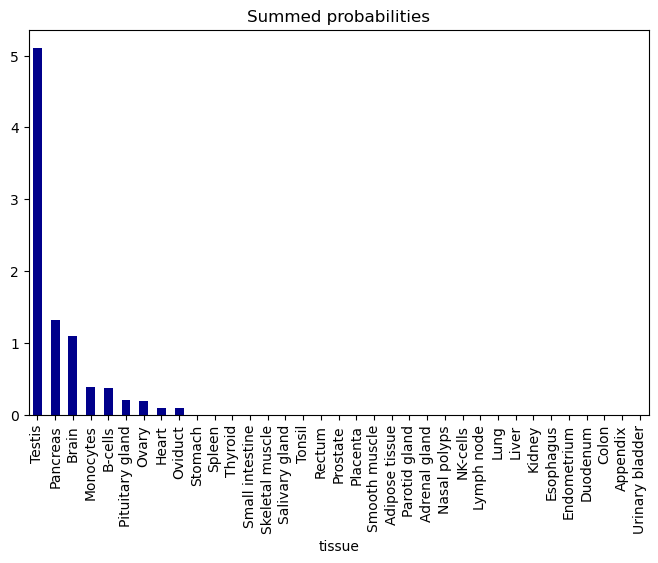

In [7]:
prediction_df.sum(axis=1).sort_values(ascending=False).plot(kind="bar", figsize=(8,5), title="Summed probabilities", color="darkblue")

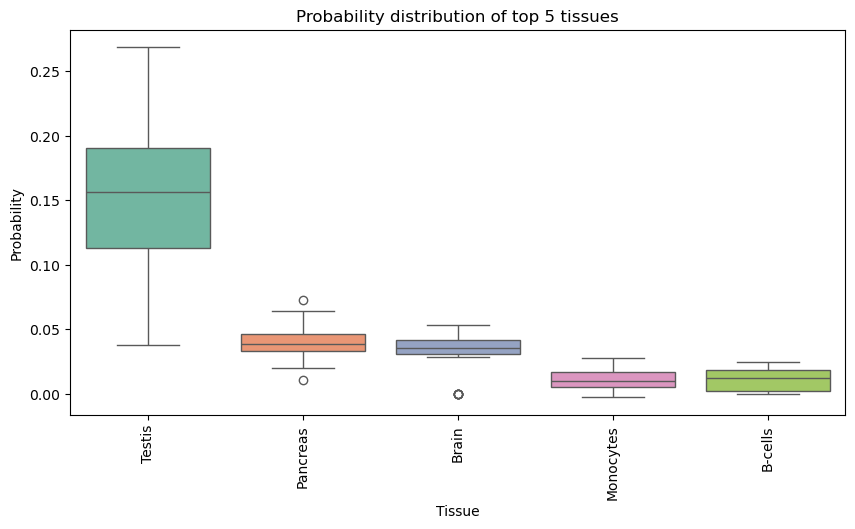

In [9]:
import seaborn as sns
selected_tissues = ['Testis', 'Pancreas', 'Brain', 'Monocytes', 'B-cells']
subset = prediction_df.loc[selected_tissues]
plt.figure(figsize=(10, 5))
sns.boxplot(data=subset.T, palette='Set2')
plt.xticks(rotation=90)
plt.title('Probability distribution of top 5 tissues')
plt.xlabel('Tissue')
plt.ylabel('Probability')
plt.show()


In [163]:
# prediction_df.to_csv('Predictions.csv')
prediction_df = pd.read_csv('Predictions.csv')
prediction_df.set_index('tissue', inplace=True)
prediction_df.head()

,gSK_testicles2Plt1_B-E17_1_6369,gSK_testicles2Plt1_B-E18_1_6370,gSK_testicles2Plt1_B-E19_1_6371,gSK_testicles2Plt1_B-E21_1_6373,gSK_testicles2Plt1_B-E22_1_6374,gSK_testicles2Plt1_B-E23_1_6375,gSK_testicles2Plt1_B-E24_1_6376,gSK_testicles2Plt1_B-F17_1_6382,gSK_testicles2Plt1_B-F18_1_6383,gSK_testicles2Plt1_B-F19_1_6384,...,gSK_testicles2Plt2_B-K9_1_6765,gSK_testicles2Plt2_B-L1_1_6782,gSK_testicles2Plt2_B-L2_1_6783,gSK_testicles2Plt2_B-L3_1_6784,gSK_testicles2Plt2_B-L4_1_6785,gSK_testicles2Plt2_B-L5_1_6786,gSK_testicles2Plt2_B-L6_1_6787,gSK_testicles2Plt2_B-L7_1_6788,gSK_testicles2Plt2_B-L8_1_6789,iQC_R-A9_1_6695
tissue,,,,,,,,,,,,,,,,,,,,,
Adipose tissue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Adrenal gland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Appendix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
B-cells,0.000000,0.020714,0.018751,0.010366,0.018136,0.010835,0.018296,0.000000,0.021592,0.00000,...,0.006151,0.021492,0.032160,0.013207,0.0,0.000000,0.003284,0.015061,0.015098,0.025062
Brain,0.038519,0.000000,0.051479,0.034329,0.034014,0.052044,0.035591,0.035559,0.044646,0.04119,...,0.000000,0.000000,0.039524,0.030060,0.0,0.029962,0.000000,0.023939,0.000000,0.040489


In [155]:
nprots_dict = {}  
#get the columns: "Protein.Ids", "	TU014944PAP_Slot1-12_1_3201.d	TU014945PAP_Slot1-"
for c in df2.columns[1:]:
    subset = df2[["Protein.Ids", c]]
    subset.dropna(inplace=True)
    subset["Protein.Ids"] = subset["Protein.Ids"].apply(lambda x: x.split(";")[0])
    number_of_proteins = subset["Protein.Ids"].nunique()

    nprots_dict[c] = number_of_proteins 

/tmp/ipykernel_109463/3394367003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplace=True)
/tmp/ipykernel_109463/3394367003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Protein.Ids"] = subset["Protein.Ids"].apply(lambda x: x.split(";")[0])
/tmp/ipykernel_109463/3394367003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.dropna(inplac

In [160]:
selected_tissues = ['Testis', 'Pancreas', 'Brain', 'Monocytes', 'B-cells']
selection = prediction_df[prediction_df.index.isin(selected_tissues)]
#for each key in the dictionary, get the Testis from prediction_df and the number of proteins from nprots_dict

scatter_df = pd.DataFrame(list(nprots_dict.items()),columns = ['Run','Number of Proteins'])
scatter_df = scatter_df.merge(selection.T, left_on='Run', right_index=True)
scatter_df.sort_values(by='Number of Proteins', ascending=False, inplace=True) 
scatter_df=scatter_df[scatter_df['Number of Proteins'] < 3000]

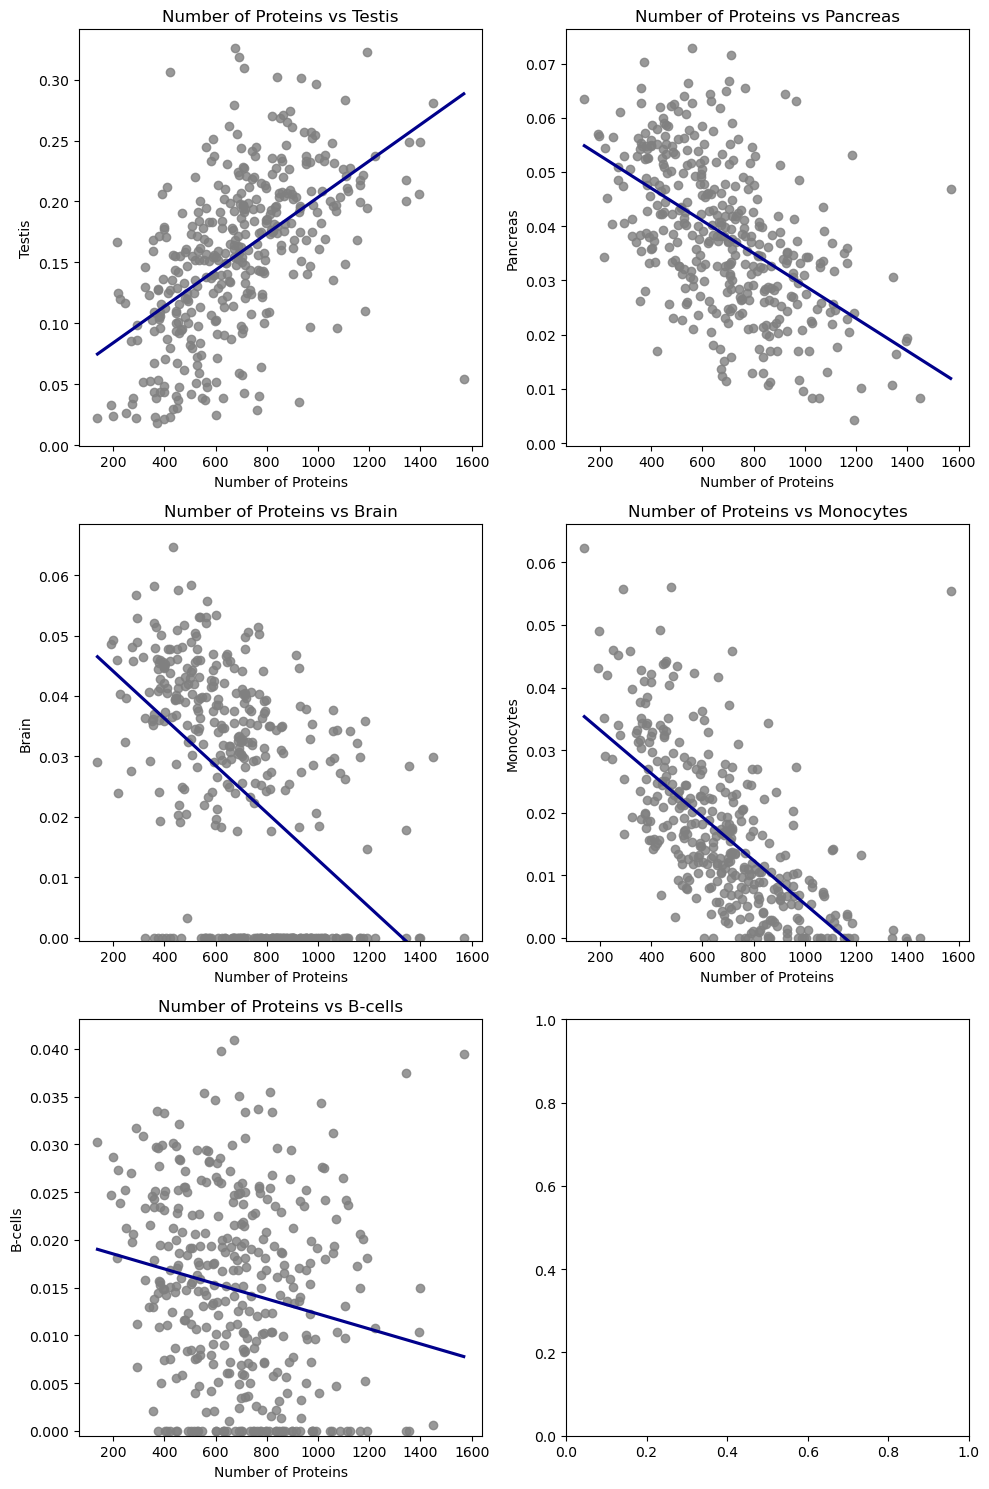

In [161]:
# make four subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

for i, tissue in enumerate(selected_tissues):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    sns.regplot(x='Number of Proteins', y=tissue, data=scatter_df, ax=ax, ci=None, scatter_kws={"color": "grey"}, line_kws={"color": "darkblue"})
    ax.set_xlabel('Number of Proteins')
    ax.set_ylabel(tissue)
    ax.set_ylim(bottom=-0.0005)  # Set the lower limit of the y-axis to zero
    ax.set_title(f'Number of Proteins vs {tissue}')

plt.tight_layout()
plt.show()


In [169]:
prediction_df.shape

(35, 379)

<Axes: title={'center': 'Testis similarity distribution'}, ylabel='Frequency'>

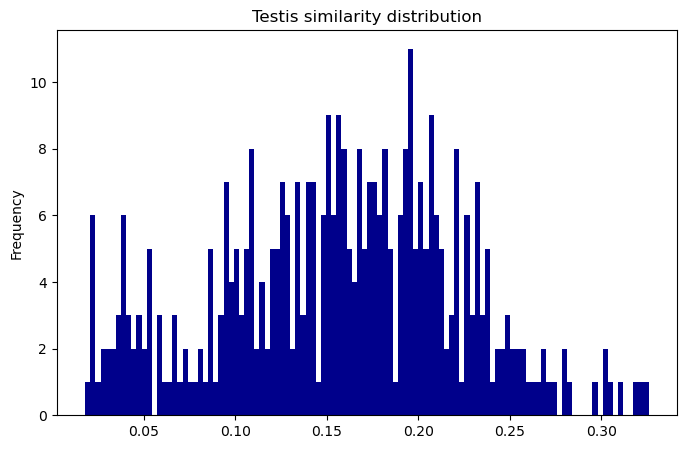

In [194]:
#make a distribution of the Testis similarity per individual cell = =column
prediction_df.loc['Testis'].plot(kind='hist', bins=110, color='darkblue', figsize=(8, 5), title='Testis similarity distribution')

In [187]:
features_path = "/home/compomics/git/MLMarker/models/features_TP_full_92%_10exp_2024.txt"   
with open(features_path, 'r') as features_file:
    MLMarker_features = features_file.read().split(',\n')



/tmp/ipykernel_109463/244036362.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_testis_df.dropna(inplace=True)
/tmp/ipykernel_109463/244036362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_testis_df.dropna(inplace=True)
/tmp/ipykernel_109463/244036362.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_testis_df["Protein.Ids"] = median_testis_df["Pr

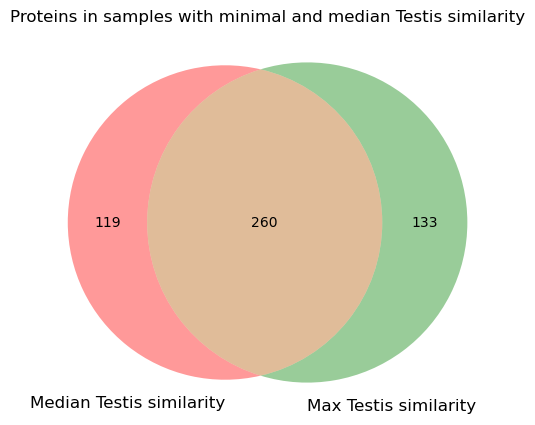

In [189]:
#Select a sample with minimal Testis similarity and maximal Testis similarity
min_testis = prediction_df.loc['Testis'].idxmin()
max_testis = prediction_df.loc['Testis'].idxmax()
#get the index of the median
median_testis = prediction_df.loc['Testis'].median()
median_testis_idx = prediction_df.loc['Testis'][prediction_df.loc['Testis'] == median_testis].index[0]

#Get the protein expression data for the selected samples
median_testis_df = df2[['Protein.Ids', median_testis_idx]]
max_testis_df = df2[['Protein.Ids', max_testis]]

#Drop rows with missing values
median_testis_df.dropna(inplace=True)
max_testis_df.dropna(inplace=True)

median_testis_df["Protein.Ids"] = median_testis_df["Protein.Ids"].apply(lambda x: x.split(";")[0])
max_testis_df["Protein.Ids"] = max_testis_df["Protein.Ids"].apply(lambda x: x.split(";")[0])


#venn diagram
from matplotlib_venn import venn2
plt.figure(figsize=(8, 5))
venn2([set(median_testis_df['Protein.Ids']).intersection(MLMarker_features), set(max_testis_df['Protein.Ids']).intersection(MLMarker_features)], set_labels=('Median Testis similarity', 'Max Testis similarity'))
plt.title('Proteins in samples with minimal and median Testis similarity')
plt.show()


# What proteins are only in the top 10 of predicted Testis

In [193]:
top_10_testis = prediction_df.loc['Testis'].nlargest(10)
top_10_testis


gSK_testicles2Plt2_B-K6_1_6762        0.325899
gSK_testicles2Plt1_B-K10_1_6436       0.322290
gSK_testicles2Plt2_B-B8_1_6523        0.318345
gSK_testicles2Plt1_re_B-H22_1_6416    0.309593
gSK_testicles2Plt2_B-J1_1_6774        0.305887
gSK_testicles2Plt2_B-K9_1_6765        0.301808
gSK_testicles2Plt2_B-L6_1_6787        0.301033
gSK_testicles2Plt1_B-H2_1_6467        0.296044
gSK_testicles2Plt1_B-K7_1_6459        0.283085
gSK_testicles2Plt2_B-I16_1_6732       0.280528
Name: Testis, dtype: float64